In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('creditcard.csv')
df=df.drop(['Time'], axis=1)
df = df.sample(frac=1, random_state=200).reset_index(drop=True)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.518438,-1.679668,-3.093086,-0.388660,0.164518,-0.769884,0.859728,-0.480274,-1.287091,1.059841,...,0.133875,0.049919,-0.434445,0.413963,0.367950,0.952559,-0.209431,-0.035346,387.20,0
1,-2.372834,-0.612308,3.224686,3.758968,-0.483226,1.615778,-1.719115,1.101559,1.853864,0.467220,...,-0.021965,0.630479,-0.499405,0.021481,0.060255,0.499542,0.329417,-0.259837,61.43,0
2,1.259924,0.259231,0.516221,0.620255,-0.469781,-0.990647,0.071091,-0.213189,0.025140,-0.069639,...,-0.255738,-0.733569,0.134905,0.383876,0.221633,0.094060,-0.028236,0.019346,1.98,0
3,-0.432809,0.441564,2.135267,1.571277,0.007931,1.057945,-0.090015,0.405717,0.597818,-0.578365,...,-0.325426,-0.474865,-0.051495,-0.426681,-0.322176,-0.406189,0.233169,0.152133,7.60,0
4,-1.152360,0.039113,1.395097,0.304623,1.032487,0.037363,0.547830,0.280413,-0.416573,-0.628372,...,0.108875,0.131383,-0.008996,-0.320344,0.203435,-0.489482,0.074864,0.119731,70.20,0
5,0.935323,0.525334,0.610043,2.969232,0.586102,1.562586,-0.417096,0.483127,1.015920,-0.500570,...,-0.149689,0.158194,0.080221,-0.782232,0.240422,0.148081,0.066208,0.027543,7.58,0
6,-1.255418,0.108084,1.390548,-0.309412,0.764440,1.731138,0.023021,0.760899,-0.231408,-0.219923,...,0.349577,1.101332,-0.032629,-1.317470,-0.312849,0.583470,0.238265,0.209448,77.72,0
7,-0.394080,-0.110982,1.508793,-2.167785,-0.444514,-0.806844,0.060008,-0.056543,-0.743371,-0.278808,...,0.400777,1.079109,-0.260015,0.074268,-0.018048,-0.185803,0.110354,0.135294,19.95,0
8,-5.125087,4.516015,-1.948553,1.074042,-2.118153,3.358132,-7.795736,-14.705213,-0.784357,-2.000163,...,-7.214019,3.679775,1.251690,0.636280,-0.704882,0.096950,-0.164654,0.650838,15.25,0
9,-9.327708,-5.993674,0.030281,4.903443,1.922944,-1.475572,-0.152179,-1.687615,0.802948,2.952602,...,-1.443987,1.439087,4.260180,0.567215,1.257005,0.593217,0.834709,-0.643416,10.62,0


In [28]:
# checking null values

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
# Normalization using MinMaxScaler
features=df.columns
xx = df[features].values
Scaler = MinMaxScaler()
x_scaled = Scaler.fit_transform(xx)
df_temp = pd.DataFrame(x_scaled, columns=features, index = df.index)
df[features] = df_temp
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.984090,0.749535,0.783815,0.234701,0.766824,0.255279,0.270593,0.780234,0.418442,0.530650,...,0.563638,0.512360,0.658982,0.438015,0.598561,0.581047,0.412645,0.312407,0.015071,0.0
1,0.917982,0.760798,0.893293,0.418562,0.762463,0.279265,0.254882,0.797202,0.526642,0.518389,...,0.561125,0.539443,0.658017,0.385129,0.581289,0.507048,0.422591,0.307851,0.002391,0.0
2,0.979698,0.769994,0.846359,0.279426,0.762554,0.253060,0.265789,0.783099,0.463646,0.507281,...,0.557357,0.475810,0.667437,0.433961,0.590347,0.440813,0.415990,0.313516,0.000077,0.0
3,0.950941,0.771918,0.874415,0.321584,0.765770,0.273656,0.264807,0.789738,0.483374,0.496756,...,0.556234,0.487879,0.664669,0.324739,0.559822,0.359098,0.420815,0.316211,0.000296,0.0
4,0.938717,0.767671,0.861589,0.265434,0.772667,0.263395,0.268693,0.788393,0.448430,0.495721,...,0.563235,0.516160,0.665300,0.339068,0.589326,0.345492,0.417893,0.315554,0.002732,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.917769,0.795687,0.810386,0.203443,0.768825,0.254192,0.271361,0.785130,0.530762,0.559188,...,0.549556,0.464788,0.668911,0.445284,0.582705,0.444137,0.431673,0.318842,0.000700,0.0
284803,0.988570,0.761000,0.813266,0.263314,0.763990,0.253070,0.266552,0.782949,0.471336,0.514867,...,0.566973,0.545131,0.664696,0.392948,0.573850,0.549015,0.414306,0.311911,0.005115,0.0
284804,0.994162,0.770607,0.794173,0.304297,0.772658,0.251444,0.271028,0.780759,0.461392,0.517656,...,0.565949,0.551921,0.662909,0.470082,0.625044,0.390273,0.415289,0.311561,0.000039,0.0
284805,0.978792,0.765091,0.858095,0.232263,0.757398,0.253546,0.261755,0.783435,0.564906,0.478125,...,0.559451,0.516854,0.665396,0.476092,0.603501,0.303074,0.417810,0.313849,0.000461,0.0


In [31]:
# splitting to train, test and validation datasets

data = np.array(df)

train_point = 150000
valid_point= train_point + 55000
test_point= data.shape[0]-valid_point

train_data = data[0:train_point,:]
valid_data = data[train_point:valid_point,:]
test_data = data[valid_point:,:]


train_x = train_data[:,0:-1]
train_y = train_data[:,-1]
valid_x = valid_data[:,0:-1]
valid_y = valid_data[:,-1]
test_x = test_data[:,0:-1]
test_y = test_data[:,-1]


one_hot_encoder = OneHotEncoder(sparse=False)
train_y = one_hot_encoder.fit_transform(train_y.reshape(-1, 1))
valid_y = one_hot_encoder.fit_transform(valid_y.reshape(-1, 1))
test_y = one_hot_encoder.fit_transform(test_y.reshape(-1, 1))



train_x.shape
train_y.shape


(150000, 2)

In [46]:
model=Sequential()
model.add(Dense(32,input_dim=29,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu', kernel_regularizer=('l2')))
model.add(Dense(2,activation='relu'))
model.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                960       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 2)                

In [47]:
history=model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=100000,epochs=10,verbose=2)

Train on 150000 samples, validate on 55000 samples
Epoch 1/10
 - 3s - loss: 6.1813 - accuracy: 0.4762 - val_loss: 1.5851 - val_accuracy: 0.5000
Epoch 2/10
 - 2s - loss: 4.5051 - accuracy: 0.4876 - val_loss: 1.1419 - val_accuracy: 0.5000
Epoch 3/10
 - 2s - loss: 3.0777 - accuracy: 0.5387 - val_loss: 0.9243 - val_accuracy: 0.5000
Epoch 4/10
 - 2s - loss: 2.0314 - accuracy: 0.6176 - val_loss: 0.8007 - val_accuracy: 0.9908
Epoch 5/10
 - 2s - loss: 1.4150 - accuracy: 0.6920 - val_loss: 0.7146 - val_accuracy: 0.9984
Epoch 6/10
 - 2s - loss: 1.0761 - accuracy: 0.7544 - val_loss: 0.6418 - val_accuracy: 0.9984
Epoch 7/10
 - 2s - loss: 0.8932 - accuracy: 0.8067 - val_loss: 0.5778 - val_accuracy: 0.9984
Epoch 8/10
 - 2s - loss: 0.7858 - accuracy: 0.8478 - val_loss: 0.5221 - val_accuracy: 0.9984
Epoch 9/10
 - 2s - loss: 0.7097 - accuracy: 0.8739 - val_loss: 0.4762 - val_accuracy: 0.9984
Epoch 10/10
 - 2s - loss: 0.6589 - accuracy: 0.8848 - val_loss: 0.4383 - val_accuracy: 0.9984


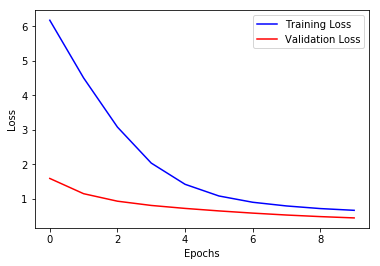

In [48]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend(loc="upper right")
# plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'],'r')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [49]:
# Evaluating the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.82%
